In [1]:
import numpy as np 
import pandas as pd 

import pickle
import itertools

import seaborn 

from pylab import *

import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt 
%matplotlib inline  

In [2]:


def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')


# create test data
# np.random.seed(19680801)



In [10]:
def save_plot(data, n, delta, name = 'test'):
    
    plt.rcParams['font.size'] = 17.5
    plt.rcParams['figure.figsize'] = 4,4

    fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharey=True)

#     ax1.set_xlabel('$n = {0}$, $\delta = {1}$'.format(n,delta))
    ax1.set_ylabel('Estimation Error')
    ax1.violinplot(data)

#     for pc in parts['bodies']:
#         pc.set_facecolor('#D43F3A')
#         pc.set_edgecolor('black')
#         pc.set_alpha(1)

    quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
    whiskers = np.array([
        adjacent_values(sorted_array, q1, q3)
        for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
    whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

    # set style for the axes 
    labels = ['Our Method', "Stein's", 'Entry-wise'] 
    
    plt.xticks([1,2,3], labels)

#     plt.subplots_adjust(bottom=0.15, wspace=0.05)
    
    plt.tight_layout()
    
    plt.savefig('./figures/{}.pdf'.format(name), format="pdf", dpi = 150)

<ipython-input-10-363ca12f561b>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharey=True)


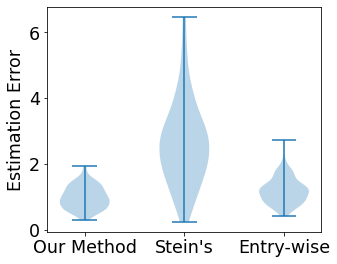

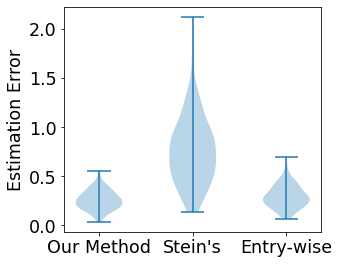

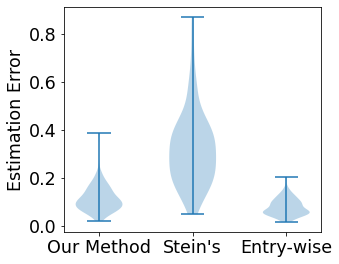

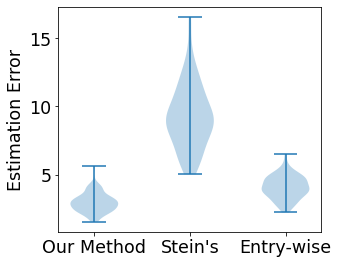

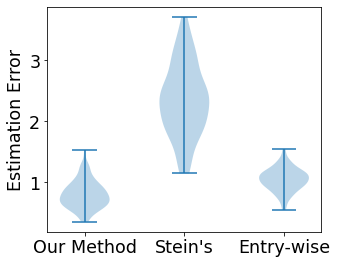

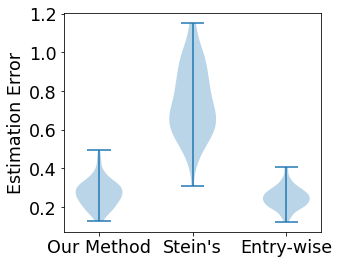

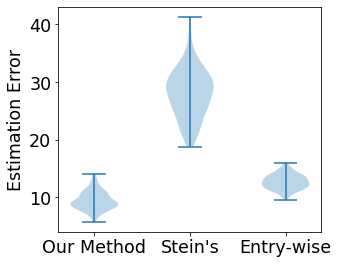

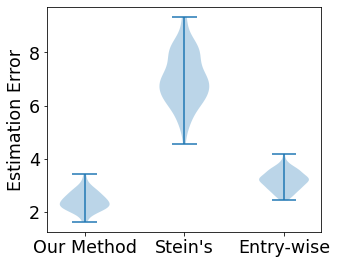

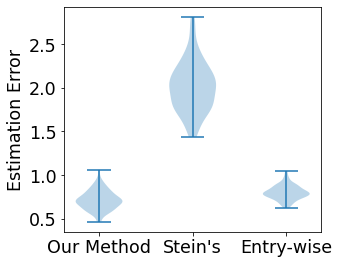

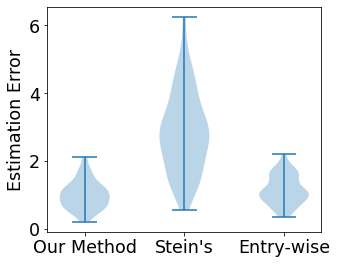

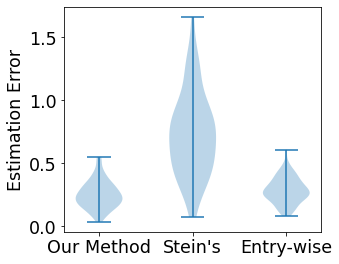

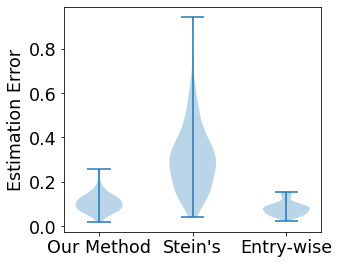

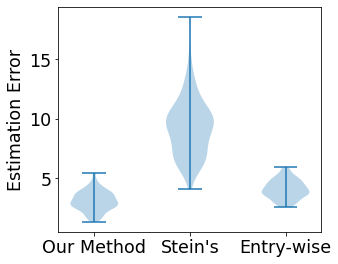

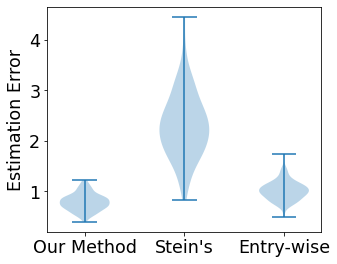

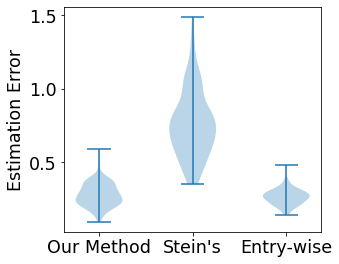

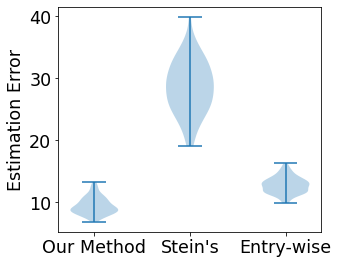

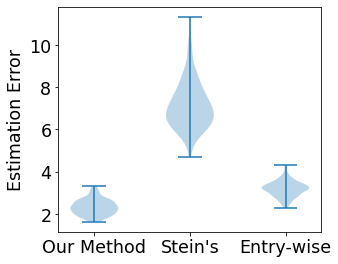

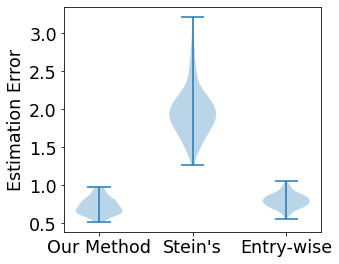

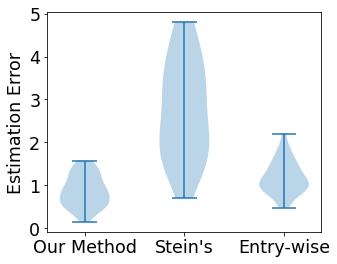

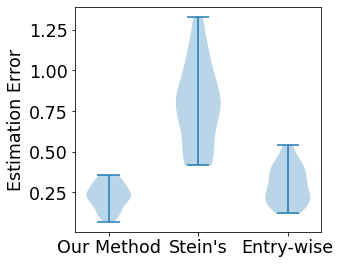

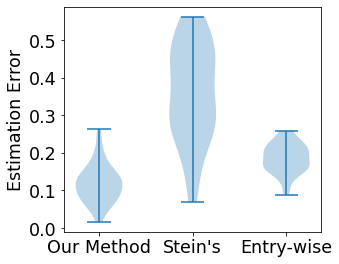

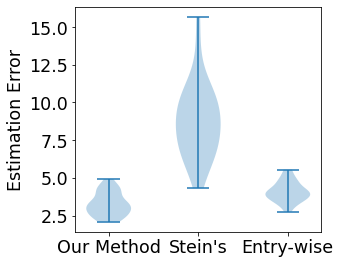

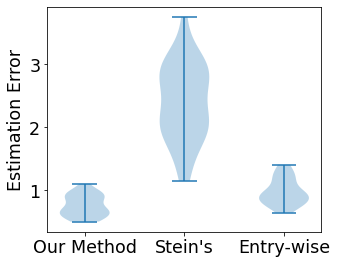

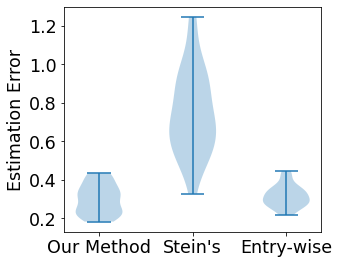

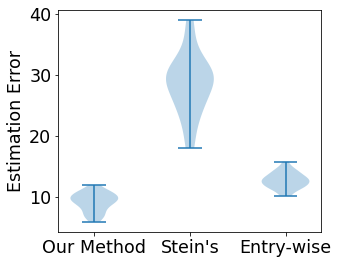

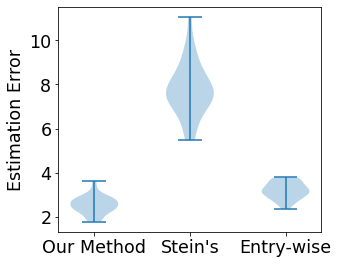

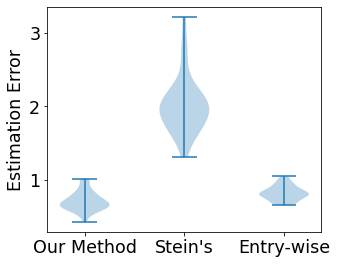

In [12]:

for t in ['euc', 'sphere', 'hyperbolic']:

    for n in [2,4,8]: 

        for delta in [0.05,0.1,0.2]: 

            (new_errors, stein_errors, entry_errors) = pickle.load( open(  './exp_data/{0}_res_delta{1}_n{2}'.format(t,delta,n), 'rb' ) ) 

            name = t + '_delta{0}_n{1}'.format(delta,n)

            save_plot([new_errors, stein_errors, entry_errors], n, delta, name) 

In [34]:
np.mean( new_errors )

1.0338617254782985

In [35]:
np.mean( entry_errors ) 

1.2692913963558499

In [7]:
# plot the errors

settings = ['sphere_lin', 'sphere_nonlin', 'euc_lin', 'euc_nonlin', 'surface_lin', 'surface_nonlin' ]

for s in settings:  
    save_plot( s ) 

FileNotFoundError: [Errno 2] No such file or directory: './sphere_lin/n=10_mu=0.01'